In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,5)})

In [41]:
mt = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/mt_gpt2-ft_all.csv')
mt_info = mt.loc[mt['move_type'].isin(['instruct', 'explain', 'check', 'query_yn', 'reply_w', 'clarify'])]
pb = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pb_gpt2-ft_all.csv')
chains = pd.read_csv('/Users/mario/code/uid-dialogue/re-analysis/results/pbchains_gpt2-ft_both_contexts.csv')


In [5]:
mt

,dialogue_id,speaker,transaction_number,transaction_type,move_number,move_type,position_in_dialogue,position_in_transaction,duration,text,...,length,tokens_h,tokens,xu_h,mi_dialogue_id,xu_h_dialogue_id,normalised_h_dialogue_id,mi_transaction_number,xu_h_transaction_number,normalised_h_transaction_number
0,q6nc3,g,1,normal,1,ready,1,1,0.3753,right,...,1,[-6.742980003356934],['right'],0.871102,NaN,NaN,NaN,NaN,NaN,NaN
1,q6nc3,g,1,normal,2,query_yn,2,2,3.4730,at the bot-- bottom of the map on the right-ha...,...,21,"[-7.3051958084106445, -0.9586701393127441, -11...","['at', 'Ġthe', 'Ġbot', '--', 'Ġbottom', 'Ġof',...",0.791112,-0.099913,0.900738,3.838463,-0.099913,0.849460,3.838463
2,q6nc3,f,1,normal,1,reply_y,3,3,4.1511,yeah,...,1,[-8.606072425842285],['yeah'],1.111788,0.407965,1.367861,8.198108,0.407965,1.036494,8.198108
3,q6nc3,f,1,normal,2,explain,4,4,1.2849,i've got the starts marked,...,6,"[-6.434814929962158, -1.8309214115142822, -0.6...","['i', ""'ve"", 'Ġgot', 'Ġthe', 'Ġstarts', 'Ġmark...",1.191393,0.132317,1.305971,5.609630,0.132317,1.223815,5.609630
4,q6nc3,g,1,normal,3,acknowledge,5,5,0.7229,right okay,...,2,"[-6.742980003356934, -2.998748540878296]","['right', 'Ġokay']",0.840677,-0.685281,1.078451,5.556146,-0.685281,0.925450,5.556146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,q8nc8,g,14,normal,97,ready,192,4,0.1548,right,...,1,[-6.742980003356934],['right'],0.871102,4.564044,0.484974,2.178936,-1.645081,1.060510,8.388061
7997,q8nc8,g,14,normal,98,instruct,193,5,6.6434,you should you should finish about two centime...,...,27,"[-6.924527645111084, -4.226017951965332, -11.4...","['you', 'Ġshould', 'Ġyou', 'Ġshould', 'Ġfinish...",0.678538,2.815091,0.010114,0.060618,-0.142622,0.721937,3.018330
7998,q8nc8,f,14,normal,96,acknowledge,194,6,0.3455,right,...,1,[-6.742980003356934],['right'],0.871102,3.992931,0.689624,2.750049,-1.444751,1.035182,8.187731
7999,q8nc8,f,14,normal,97,check,195,7,0.8917,that's the finish then,...,5,"[-7.703193664550781, -0.7703691720962524, -3.9...","['that', ""'s"", 'Ġthe', 'Ġfinish', 'Ġthen']",0.906401,-4.816830,1.578974,9.463390,-0.609677,1.083435,5.256237


# Map Task

### Dialogue - all acts

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/2447622596.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt.groupby('position_in_dialogue').mean()['normalised_h'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/2447622596.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt.groupby('position_in_dialogue').mean()['normalised_h_dialogue_id'],


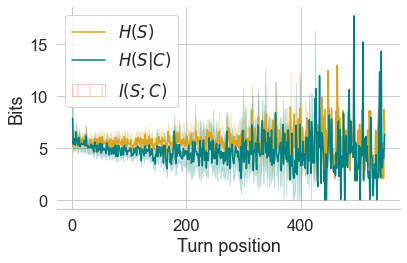

In [20]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt,
             x="position_in_dialogue", y="normalised_h", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=mt,
             x="position_in_dialogue", y="normalised_h_dialogue_id", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, mt['position_in_dialogue'].max() + 1),
                 mt.groupby('position_in_dialogue').mean()['normalised_h'],
                 mt.groupby('position_in_dialogue').mean()['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Turn position")
plt.ylabel("Bits")
plt.legend(loc='upper left')
sns.despine(left=True)
plt.tight_layout()
# sns.set(font_scale = 2)
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc.pdf')

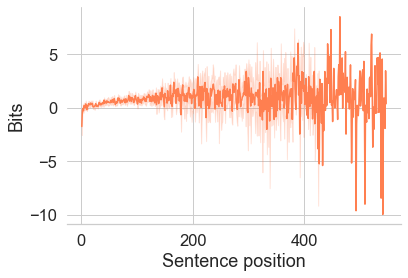

In [21]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt,
             x="position_in_dialogue", y="mi_dialogue_id", color='coral')

plt.xlabel("Sentence position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc-mi.pdf')

### Dialogue - information transmission acts

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/2401553839.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt_info.groupby('position_in_dialogue').mean()['normalised_h'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/2401553839.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt_info.groupby('position_in_dialogue').mean()['normalised_h_dialogue_id'],


ValueError: operands could not be broadcast together with shapes (546,) (456,) 

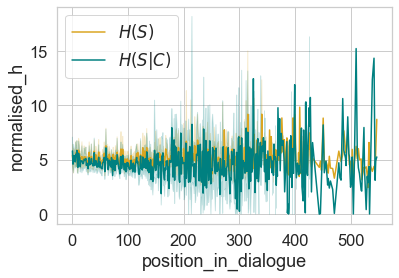

In [22]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info,
             x="position_in_dialogue", y="normalised_h", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=mt_info,
             x="position_in_dialogue", y="normalised_h_dialogue_id", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, mt_info['position_in_dialogue'].max() + 1),
                 mt_info.groupby('position_in_dialogue').mean()['normalised_h'],
                 mt_info.groupby('position_in_dialogue').mean()['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Turn position")
plt.ylabel("Bits")
plt.legend(loc='upper left')
sns.despine(left=True)
plt.tight_layout()
# sns.set(font_scale = 2)
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc.pdf')

In [ ]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info,
             x="position_in_dialogue", y="mi_dialogue_id", color='coral')

plt.xlabel("Sentence position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc-mi.pdf')

### Transaction - all acts

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/4171891430.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt.groupby('position_in_transaction').mean()['normalised_h'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/4171891430.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt.groupby('position_in_transaction').mean()['normalised_h_transaction_number'],


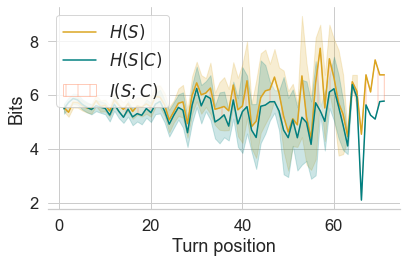

In [23]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt,
             x="position_in_transaction", y="normalised_h", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=mt,
             x="position_in_transaction", y="normalised_h_transaction_number", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, mt['position_in_transaction'].max() + 1),
                 mt.groupby('position_in_transaction').mean()['normalised_h'],
                 mt.groupby('position_in_transaction').mean()['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Turn position")
plt.ylabel("Bits")
plt.legend(loc='upper left')
sns.despine(left=True)
plt.tight_layout()
# sns.set(font_scale = 2)
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc.pdf')

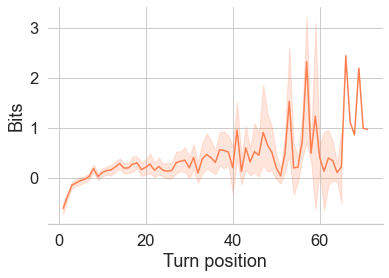

In [24]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt,
             x="position_in_transaction", y="mi_transaction_number", color='coral')

plt.xlabel("Turn position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc-mi.pdf')

### Transactions - information transmission acts

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/69747642.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt_info.groupby('position_in_transaction').mean()['normalised_h'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/69747642.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mt_info.groupby('position_in_transaction').mean()['normalised_h_transaction_number'],


ValueError: operands could not be broadcast together with shapes (68,) (65,) 

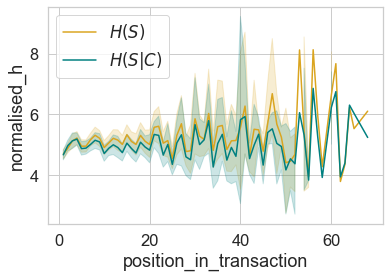

In [27]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info,
             x="position_in_transaction", y="normalised_h", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=mt_info,
             x="position_in_transaction", y="normalised_h_transaction_number", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, mt_info['position_in_transaction'].max() + 1),
                 mt_info.groupby('position_in_transaction').mean()['normalised_h'],
                 mt_info.groupby('position_in_transaction').mean()['normalised_h_transaction_number'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Turn position")
plt.ylabel("Bits")
plt.legend(loc='upper left')
sns.despine(left=True)
plt.tight_layout()
# sns.set(font_scale = 2)
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc.pdf')

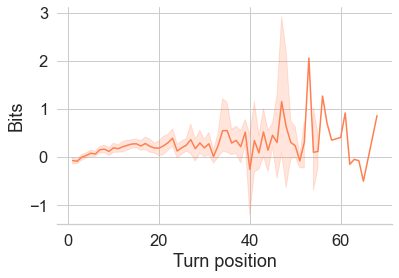

In [26]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info,
             x="position_in_transaction", y="mi_transaction_number", color='coral')

plt.xlabel("Turn position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc-mi.pdf')

### Roles

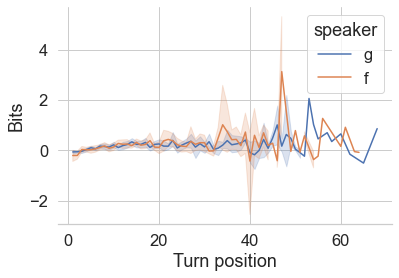

In [31]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=mt_info,
             x="position_in_transaction", y="mi_transaction_number", color='coral', hue='speaker')

plt.xlabel("Turn position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/ptb-doc-mi.pdf')

----

# Photobook

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/3742823776.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pb.groupby('position_in_dialogue').mean()['normalised_h'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/3742823776.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pb.groupby('position_in_dialogue').mean()['normalised_h_dialogue_id'],


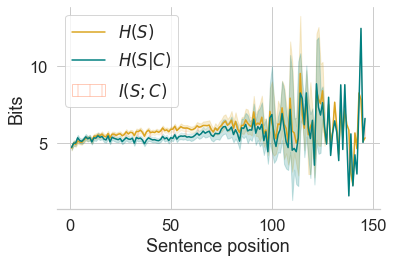

In [34]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=pb,
             x="position_in_dialogue", y="normalised_h", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=pb,
             x="position_in_dialogue", y="normalised_h_dialogue_id", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, pb['position_in_dialogue'].max() + 1), 
                 pb.groupby('position_in_dialogue').mean()['normalised_h'], 
                 pb.groupby('position_in_dialogue').mean()['normalised_h_dialogue_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Sentence position")
plt.ylabel("Bits")
plt.legend(loc='upper left')
sns.despine(left=True)
plt.tight_layout()
sns.set(font_scale = 2)
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/pb-doc.pdf')

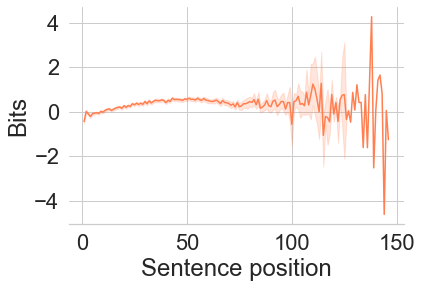

In [35]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=pb,
             x="position_in_dialogue", y="mi_dialogue_id", color='coral')

plt.xlabel("Sentence position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/pb-doc-mi.pdf')

---

# Chains

In [42]:
chains.head()

,Unnamed: 0,dialogue_id,speaker,position_in_chain,round_number,text,chain_id,h,normalised_h,length,...,xu_h,mi_chains_id,xu_h_chains_id,normalised_h_chains_id,hs_dial,hsc_dial,xu_hs_dial,xu_hsc_dial,mi_dial,xu_mi_dial
0,0,2389,A,1,1,kids playing soccer in green jerseys?,1,26.546213,3.792316,7,...,0.704599,-1.143300,0.983489,4.935616,3.792316,3.237888,0.762112,0.650693,0.554428,0.111419
1,1,2389,A,2,2,kids playing soccer in green jerseys?,1,26.546213,3.792316,7,...,0.704599,1.591099,0.459267,2.201217,3.792316,2.214225,0.762112,0.444975,1.578091,0.317136
2,2,2389,B,3,4,4 young boys in green jersey shirts playing so...,1,51.377193,5.137719,10,...,1.071240,0.345703,1.126581,4.792016,5.137719,4.624220,1.149849,1.034925,0.513499,0.114924
3,3,1969,B,1,1,I have kids playing soccer in green uniforms,2,21.162553,2.645319,8,...,0.500980,-0.143978,0.581966,2.789297,2.645319,2.789295,0.542072,0.571575,-0.143976,-0.029503
4,4,1969,A,2,3,s playing soccer,2,35.640477,11.880159,3,...,1.543971,0.546248,1.665707,11.333911,11.880158,12.443303,1.688676,1.768723,-0.563145,-0.080047


/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/917170590.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chains.groupby('position_in_chain').mean()['normalised_h'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/917170590.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chains.groupby('position_in_chain').mean()['normalised_h_chains_id'],


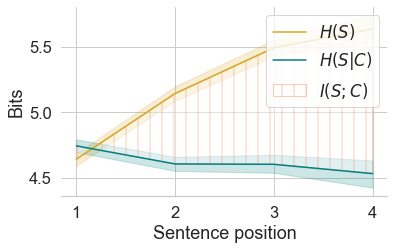

In [43]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=chains,
             x="position_in_chain", y="normalised_h", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=chains,
             x="position_in_chain", y="normalised_h_chains_id", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, chains['position_in_chain'].max() + 1),
                 chains.groupby('position_in_chain').mean()['normalised_h'],
                 chains.groupby('position_in_chain').mean()['normalised_h_chains_id'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Sentence position")
plt.ylabel("Bits")
plt.legend(loc='upper right')
sns.despine(left=True)
sns.set(font_scale = 2)
plt.tight_layout()
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/bncs-doc.pdf')

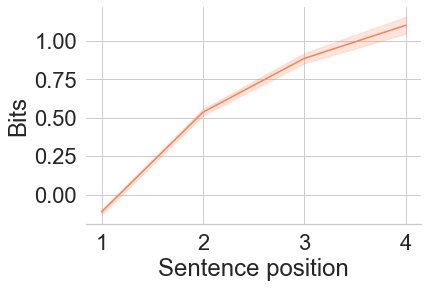

In [44]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=chains,
             x="position_in_chain", y="mi_chains_id", color='coral')

plt.xlabel("Sentence position")
plt.ylabel("Bits")
sns.despine(left=True)
sns.set(font_scale = 1.5)

plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/bncs-doc-mi.pdf')

/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/508053783.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chains.groupby('position_in_chain').mean()['hs_dial'],
/var/folders/0s/847v13g104z23kr193w_v2640000gn/T/ipykernel_51508/508053783.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chains.groupby('position_in_chain').mean()['hsc_dial'],


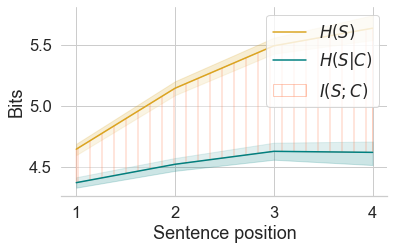

In [45]:
sns.set_style("whitegrid")
sns_plot = sns.lineplot(data=chains,
             x="position_in_chain", y="hs_dial", label='$H(S)$', color='goldenrod')

sns_plot = sns.lineplot(data=chains,
             x="position_in_chain", y="hsc_dial", label='$H(S|C)$', color='teal')

plt.fill_between(range(1, chains['position_in_chain'].max() + 1),
                 chains.groupby('position_in_chain').mean()['hs_dial'],
                 chains.groupby('position_in_chain').mean()['hsc_dial'],
                 hatch='|',
                 alpha = 0.4,
                 color='coral',
                 facecolor='white',
                 label='$I(S;C)$'
                )

plt.xlabel("Sentence position")
plt.ylabel("Bits")
plt.legend(loc='upper right')
sns.despine(left=True)
sns.set(font_scale = 2)
plt.tight_layout()
plt.show()
# plt.savefig('/Users/mario/code/erp-paper/conll2021/figures/wlimit/bncs-doc.pdf')